In [1]:
import sys
from datetime import datetime, timezone

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from feature_composer import FeatureComposer

sys.path.append("../airflow/plugins")

from domain_model import Interval
from synthetic_data_adapter import SyntheticDataAdapter

In [2]:
interval = Interval.hour_1

def linear(x: np.array):
    w = 0.2
    b = 0.1
    return w * x + b

def sinus(x: np.array):
    return np.sin(x)

synthetic_adapter = SyntheticDataAdapter(func=linear, interval=interval, use_sampling=True)
composer = FeatureComposer(data_adapter=synthetic_adapter)

train_start_time_utc = datetime(2022, 4, 1, tzinfo=timezone.utc)
train_end_time_utc = datetime(2022, 5, 31, tzinfo=timezone.utc)

df = composer.compose(train_start_time_utc, train_end_time_utc)
df.drop(df.index[-1], inplace=True)
df

,open,high,low,close,feature_close_return,info_intraday_return
time_utc,,,,,,
2022-04-01 01:00:00+00:00,0.22,0.32,0.22,0.32,0.12,0.1
2022-04-01 02:00:00+00:00,0.34,0.44,0.34,0.44,0.12,0.1
2022-04-01 03:00:00+00:00,0.46,0.56,0.46,0.56,0.12,0.1
2022-04-01 04:00:00+00:00,0.58,0.68,0.58,0.68,0.12,0.1
2022-04-01 05:00:00+00:00,0.70,0.80,0.70,0.80,0.12,0.1
...,...,...,...,...,...,...
2022-05-30 19:00:00+00:00,172.30,172.40,172.30,172.40,0.12,0.1
2022-05-30 20:00:00+00:00,172.42,172.52,172.42,172.52,0.12,0.1
2022-05-30 21:00:00+00:00,172.54,172.64,172.54,172.64,0.12,0.1


In [3]:
df["feature_close_return"].describe()


count    1.439000e+03
mean     1.200000e-01
std      2.776522e-17
min      1.200000e-01
25%      1.200000e-01
50%      1.200000e-01
75%      1.200000e-01
max      1.200000e-01
Name: feature_close_return, dtype: float64

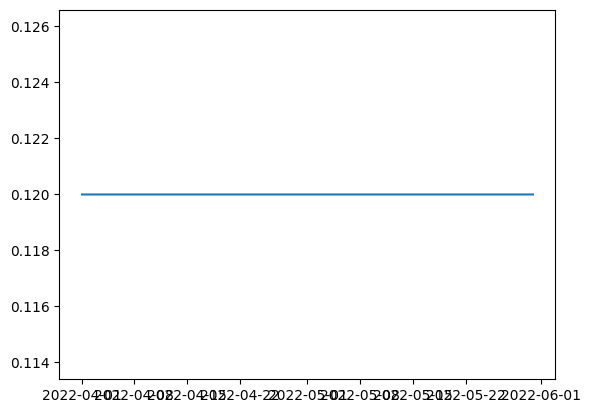

In [4]:
plt.plot(df["feature_close_return"])